# Block Zone Simulator

This notebook / repo will be used to play around with block zone configurations and run simulations to determine the theoretical and practical capacity of an attraction.

In [2]:
# define blocks

blocks = {
    'station 1': {
        'next_block': 'lift 1',
        'seconds_to_reach_block': 8,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 38,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'station 2': {
        'next_block': 'lift 1',
        'seconds_to_reach_block': 8,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 38,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'lift 1': {
        'next_block': 'gravity 1',
        'seconds_to_reach_block': 18,
        'seconds_to_clear_from_held': 8,
        'seconds_to_clear_block_in_motion': 7,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': True,
        'merger_block_a': 'station 1',
        'merger_block_b': 'station 2',
        'corresponding_splitter_block': 'final block 1',
        'seconds_to_clear_merger': 2,
        'seconds_merger_to_block': 16,  # purely for reference at the moment
        'has_splitter_switch': False
    },
    'gravity 1': {
        'next_block': 'lift 2',
        'seconds_to_reach_block': 30,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 3,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'lift 2': {
        'next_block': 'gravity 2',
        'seconds_to_reach_block': 20,
        'seconds_to_clear_from_held': 8,
        'seconds_to_clear_block_in_motion': 7,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'gravity 2': {
        'next_block': 'final block 1',
        'seconds_to_reach_block': 22,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 3,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'final block 1': {
        'next_block': 'station 1',
        'seconds_to_reach_block': 8,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 3,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': True,
        'splitter_block_a': 'station 1',
        'splitter_block_b': 'station 2',
        'corresponding_merger_block': 'lift 1'
    }
}

# define optional params
optional_params = {
    'sluggishness': True,
    'sluggishness_mu': 1.5,
    'sluggishness_sigma': 0.6,
    'random_seed': 10
}

In [3]:
from circuit import Circuit

circuit = Circuit(blocks, num_trains=3, optional_params=optional_params)

In [4]:
# run the sim
for _ in range(36000):
    circuit.step()

Creating animation...
..........................................................................................................................................................................................................................................................................................................................................................................Animation saved.


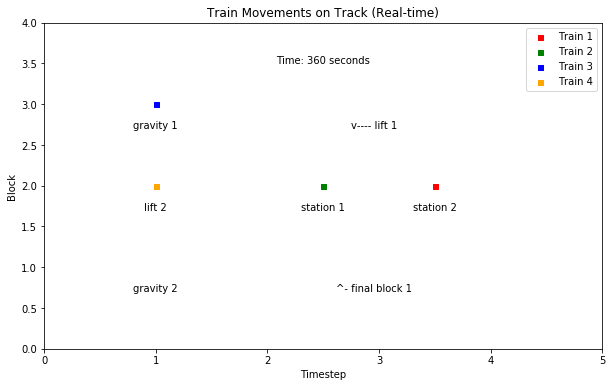

In [37]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
import numpy as np
from IPython.display import clear_output

num_trains = 4
num_timesteps = 360
train_blocks = None  # Store current block
circuit = Circuit(blocks, num_trains=num_trains, optional_params=optional_params)

block_locs = {
    'station 1': (2.5, 2),
    'station 2': (3.5, 2),
    'lift 1': (3, 3),
    'gravity 1': (1, 3),
    'lift 2': (1, 2),
    'gravity 2': (1, 1),
    'final block 1': (3, 1),
}

block_txt = {block: block for block in circuit.blocks}
train_colors = ['red', 'green', 'blue', 'orange', 'purple', 'black']

# Simulation loop
def create_gif(num_timesteps):
    
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel("Timestep")
    plt.ylabel("Block")
    plt.title("Train Movements on Track (Real-time)")
    plt.ylim(0, 4)  # Adjust y-limit based on your block range
    plt.xlim(0, 5)
    scatters = [ax.scatter([], [], c=train_colors[i], s=25, marker='s', label=f"Train {i+1}") for i in range(num_trains)]
    texts = [ax.text(block_locs[b][0], block_locs[b][1] - 0.2, block_txt[b], ha='center', va='top') for b in circuit.blocks]
    texts.append(ax.text(2.5, 3.6, f'Time: 0 seconds', ha='center', va='top'))
    ax.legend()
    
    def animate(frame):
        # step simulation and update visualization for new frame=timestep
        circuit.step()
        print('.',end='')
        train_blocks = [block_locs[circuit.trains[t].current_block] for t in circuit.trains]
        if circuit.blocks['final block 1'].splitter_switch_position == 'station 1':
            block_txt['final block 1'] = '^- final block 1   '
        else:
            block_txt['final block 1'] = '   final block 1 -^'
        if circuit.blocks['lift 1'].merger_switch_position == 'station 1':
            block_txt['lift 1'] = 'v---- lift 1   '
        else:
            block_txt['lift 1'] = '   lift 1 ----v'

        # show labels for block areas
        i = 0
        for b in circuit.blocks:
            texts[i].set_text(block_txt[b])
            i += 1
        # update sim time
        texts[-1].set_text(f'Time: {frame+1} seconds')
        
        # Update the train locations
        for i in range(num_trains):
            scatters[i].set_offsets([(train_blocks[i][0], train_blocks[i][1])])
        
        return scatters
        
    anim = FuncAnimation(
        fig,
        animate,
        frames = num_timesteps,
        interval = 100,
        blit = True
    )

    return anim

print("Creating animation...")
anim = create_gif(num_timesteps)

writer = PillowWriter(fps=10) 
anim.save('train_animation.gif', writer=writer) 
print("Animation saved.")

# Display the animation in the notebook
#HTML(anim.to_jshtml()) 

## Simulation Animation - No GIF Creation

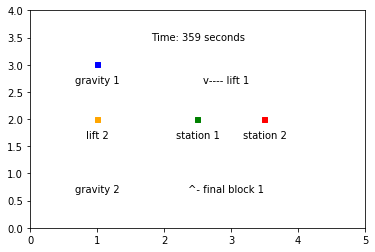

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Sample data (replace with your actual simulation data)
num_trains = 4
num_timesteps = 360
train_blocks = None  # Store current block
circuit = Circuit(blocks, num_trains=num_trains, optional_params=optional_params)

# Initialize the plot
plt.figure(figsize=(10, 6))
plt.xlabel("Timestep")
plt.ylabel("Block")
plt.title("Train Movements on Track (Real-time)")
plt.ylim(0, 4)  # Adjust y-limit based on your block range
plt.xlim(0, 5)
plt.ion()  # Turn on interactive mode

block_locs = {
    'station 1': (2.5, 2),
    'station 2': (3.5, 2),
    'lift 1': (3, 3),
    'gravity 1': (1, 3),
    'lift 2': (1, 2),
    'gravity 2': (1, 1),
    'final block 1': (3, 1),
}

block_txt = {block: block for block in circuit.blocks}

train_colors = ['red', 'green', 'blue', 'orange', 'purple', 'black']  # List of colors

# Simulation loop
for t in range(num_timesteps):
    # Simulate train movement (replace with your actual logic)
    circuit.step()
    train_blocks = [block_locs[circuit.trains[t].current_block] for t in circuit.trains]
    # splitter_switch_position
    if circuit.blocks['final block 1'].splitter_switch_position == 'station 1':
        block_txt['final block 1'] = '^- final block 1   '
    else:
        block_txt['final block 1'] = '   final block 1 -^'
    if circuit.blocks['lift 1'].merger_switch_position == 'station 1':
        block_txt['lift 1'] = 'v---- lift 1   '
    else:
        block_txt['lift 1'] = '   lift 1 ----v'
    # Clear the previous plot
    clear_output(wait=True)
    
    # show labels for block areas
    for b in block_locs:
        block_x, block_y = block_locs[b]
        plt.text(block_x, block_y - 0.2, block_txt[b], ha='center', va='top')
    plt.text(2.5, 3.6, f'Time: {t} seconds', ha='center', va='top')
    # Update the plot # color=train_colors[:num_trains]
    #plt.plot([x[0] for x in train_blocks], [x[1] for x in train_blocks], marker='s', linestyle='none')
    plt.scatter([x[0] for x in train_blocks], [x[1] for x in train_blocks], 
                c=train_colors[:num_trains], marker='s', s=25)
    plt.ylim(0, 4)  # Adjust y-limit based on your block range
    plt.xlim(0, 5)
    #plt.legend()  # [f"Train {i+1}" for i in range(num_trains)]
    plt.draw()
    plt.pause(0.01)  # Adjust pause time for animation speed

plt.ioff()  # Turn off interactive mode
plt.show()

In [10]:
#trains
#for train in circuit.trains:
#    print(vars(circuit.trains[train]))
#    print('')
    
#for block in circuit.blocks:
#    print(vars(circuit.blocks[block]))
#    print('')
circuit.time

360

In [11]:
# question - what percent of the sim run time did each train sit idle?
for train_name in circuit.trains:
    print(round(100*circuit.trains[train_name].total_seconds_held / circuit.time, 2))
    
# if we set run time to 1 million seconds, they all converge to the same % idle.

5.0
0.0
4.72
0.0


In [23]:
circuit.blocks

{'station 1': <block.Block at 0x1e59e7daef0>,
 'station 2': <block.Block at 0x1e59e7daf28>,
 'lift 1': <block.Block at 0x1e59e7da780>,
 'gravity 1': <block.Block at 0x1e59e7da4a8>,
 'lift 2': <block.Block at 0x1e59e7da908>,
 'gravity 2': <block.Block at 0x1e59e7da828>,
 'final block 1': <block.Block at 0x1e59e7dab38>}

In [24]:
num_riders_per_train = 24
avg_cycles_completed = sum([circuit.trains[train].circuits_completed for train in circuit.trains]) / len(circuit.trains)
avg_cycles_per_hour = avg_cycles_completed * 3600 / circuit.time
total_cycles_per_hour = avg_cycles_per_hour * len(circuit.trains)
total_hourly_capacity = num_riders_per_train * total_cycles_per_hour
total_hourly_capacity # 463 (1) 928.8 (2) 1394 (3) 1378 (4)

1939.1999999999998

In [25]:
import random
import numpy as np

rng = np.random.default_rng(10)


mean sluggishness:	 5.369
0th percentile: 	0.349
25th percentile: 	2.992
50th percentile: 	4.486
75th percentile: 	6.713
100th percentile: 	61.614


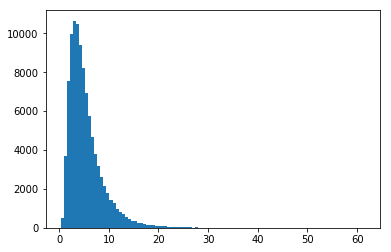

In [26]:
from matplotlib import pyplot as plt

simulated_sluggishness = rng.lognormal(mean=1.5, sigma=0.6, size=100000)
print(f"mean sluggishness:\t {round(simulated_sluggishness.mean(),3)}")
for p in [0, 25, 50, 75, 100]:
    print(f"{p}th percentile: \t{round(np.percentile(simulated_sluggishness,p),3)}")

plt.hist(simulated_sluggishness, bins=100)
plt.show()

# lognormal distribution with mean=1.5 and sigma=0.6 seems to give realistic load time slowdowns.
# mean is 5.34, or approx. 5 seconds above theoretical dispatch


## Example Study

### Comparing Theoretical vs. Actual Capacity

Using the toy example in this notebook, we can compare theoretical vs actual capacity with both simulated load/unload sluggishness and perfect dispatches.

In [28]:
from circuit import Circuit
import numpy as np
import pandas as pd

blocks = {
    'station 1': {
        'next_block': 'lift 1',
        'seconds_to_reach_block': 8,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 38,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'station 2': {
        'next_block': 'lift 1',
        'seconds_to_reach_block': 8,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 38,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'lift 1': {
        'next_block': 'gravity 1',
        'seconds_to_reach_block': 18,
        'seconds_to_clear_from_held': 8,
        'seconds_to_clear_block_in_motion': 7,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': True,
        'merger_block_a': 'station 1',
        'merger_block_b': 'station 2',
        'seconds_to_clear_merger': 2,
        'seconds_merger_to_block': 16,  # purely for reference at the moment
        'has_splitter_switch': False
    },
    'gravity 1': {
        'next_block': 'lift 2',
        'seconds_to_reach_block': 30,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 3,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'lift 2': {
        'next_block': 'gravity 2',
        'seconds_to_reach_block': 20,
        'seconds_to_clear_from_held': 8,
        'seconds_to_clear_block_in_motion': 7,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'gravity 2': {
        'next_block': 'final block 1',
        'seconds_to_reach_block': 22,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 3,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'final block 1': {
        'next_block': 'station 1',
        'seconds_to_reach_block': 8,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 3,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': True,
        'splitter_block_a': 'station 1',
        'splitter_block_b': 'station 2'
    }
}

optional_params = {
    'sluggishness': True,
    'sluggishness_mu': 1.5,
    'sluggishness_sigma': 0.6,
    'random_seed': 10
}

def calculate_hourly_capacity(vehicle_capacity, circuit):
    avg_cycles_completed = sum([circuit.trains[train].circuits_completed for train in circuit.trains]) / len(circuit.trains)
    avg_cycles_per_hour = avg_cycles_completed * 3600 / circuit.time
    total_cycles_per_hour = avg_cycles_per_hour * len(circuit.trains)
    total_hourly_capacity = vehicle_capacity * total_cycles_per_hour
    return total_hourly_capacity

theoretical_capacities = []
theoretical_idle_percents = []
actual_capacities = []
actual_idle_percents = []

sim_run_time = 36000  # 10 hours (60s * 60min * 10hr)

for n in [1, 2, 3, 4, 5, 6]:
    # run without sluggishness
    optional_params['sluggishness'] = False
    circuit = Circuit(blocks, num_trains=n, optional_params=optional_params)
    for _ in range(sim_run_time):
        circuit.step()
    # analyze results
    theoretical_capacities.append(calculate_hourly_capacity(vehicle_capacity=24, circuit=circuit))
    train_idles = []
    for train_name in circuit.trains:
        train_idles.append(100*circuit.trains[train_name].total_seconds_held / circuit.time)
    theoretical_idle_percents.append(round(np.mean(train_idles),2))
    # run again with sluggishness
    optional_params['sluggishness'] = True
    circuit = Circuit(blocks, num_trains=n, optional_params=optional_params)
    for _ in range(sim_run_time):
        circuit.step()
    actual_capacities.append(calculate_hourly_capacity(vehicle_capacity=24, circuit=circuit))
    train_idles = []
    for train_name in circuit.trains:
        train_idles.append(100*circuit.trains[train_name].total_seconds_held / circuit.time)
    actual_idle_percents.append(round(np.mean(train_idles),2))

df = pd.DataFrame({
    'num_trains': list(range(1,7)),
    'theoretical_capacity': theoretical_capacities,
    'actual_capacity': actual_capacities,
    'theoretical_idle_percents': theoretical_idle_percents,
    'actual_idle_percents': actual_idle_percents
})

df

,num_trains,theoretical_capacity,actual_capacity,theoretical_idle_percents,actual_idle_percents
0,1,463.2,453.6,0.00,0.00
1,2,748.8,734.4,18.91,18.61
2,3,1392.0,1353.6,0.02,0.11
3,4,1857.6,1797.6,0.02,0.45
4,5,1939.2,1939.2,15.70,13.42
5,6,1728.0,1728.0,32.69,31.02


From the above results, we can see that the highest theoretical capacity for this circuit with 7 complete block zones is 1,939 riders per hour, when operating 5 trains.  Operating six trains decreases this theoretical capacity.  Adding dispatch delay times to the simulation shows a decrease in achieved throughput when 4 or fewer trains are running.  It is interesting to see that delayed dispatched don't affect throughput when 5 or 6 trains are running.  This indicates that there is a bottleneck somewhere else in the layout and analyzing holding times at each individual block might give a better explanation.

## Everest

In [15]:
from circuit import Circuit
import numpy as np
import pandas as pd

blocks = {
    'Load': {
        'next_block': 'A Lift',
        'seconds_to_reach_block': 8,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 34,  # true is ~ 34?
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'A Lift': {
        'next_block': 'B Lift',
        'seconds_to_reach_block': 14,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 4,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'B Lift': {
        'next_block': 'Zone 1',
        'seconds_to_reach_block': 36,  # correct this - B Lift hold is at bottom of lift, not top of lift!
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 4,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'Zone 1': {
        'next_block': 'Zone 2',
        'seconds_to_reach_block': 11,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 9,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'Zone 2': {
        'next_block': 'Zone 3',
        'seconds_to_reach_block': 18,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 10,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'Zone 3': {
        'next_block': 'Hold',
        'seconds_to_reach_block': 24,
        'seconds_to_clear_from_held': 7,
        'seconds_to_clear_block_in_motion': 2,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'Hold': {
        'next_block': 'Unload',
        'seconds_to_reach_block': 24,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 4,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'Unload': {
        'next_block': 'Load',
        'seconds_to_reach_block': 6,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 10,  # was 20
        'has_merger_switch': False,
        'has_splitter_switch': False
    }
}

optional_params = {
    'sluggishness': True,
    'sluggishness_mu': 1.5,
    'sluggishness_sigma': 0.6,
    'random_seed': 10,
    'circuit_completion_blocks': ['Load']
}

def calculate_hourly_capacity(vehicle_capacity, circuit):
    avg_cycles_completed = sum([circuit.trains[train].circuits_completed for train in circuit.trains]) / len(circuit.trains)
    avg_cycles_per_hour = avg_cycles_completed * 3600 / circuit.time
    total_cycles_per_hour = avg_cycles_per_hour * len(circuit.trains)
    total_hourly_capacity = vehicle_capacity * total_cycles_per_hour
    return total_hourly_capacity

theoretical_capacities = []
theoretical_idle_percents = []
actual_capacities = []
actual_idle_percents = []

sim_run_time = 72000  # 10 hours (60s * 60min * 10hr)
vehicle_capacity = 34

for n in [1, 2, 3, 4, 5]:
    # run without sluggishness
    optional_params['sluggishness'] = False
    circuit = Circuit(blocks, num_trains=n, optional_params=optional_params)
    for _ in range(sim_run_time):
        circuit.step()
    # analyze results
    theoretical_capacities.append(calculate_hourly_capacity(vehicle_capacity=vehicle_capacity, circuit=circuit))
    train_idles = []
    for train_name in circuit.trains:
        train_idles.append(100*circuit.trains[train_name].total_seconds_held / circuit.time)
    theoretical_idle_percents.append(round(np.mean(train_idles),2))
    # run again with sluggishness
    optional_params['sluggishness'] = True  # change this back
    circuit = Circuit(blocks, num_trains=n, optional_params=optional_params)
    for _ in range(sim_run_time):
        circuit.step()
    actual_capacities.append(calculate_hourly_capacity(vehicle_capacity=vehicle_capacity, circuit=circuit))
    train_idles = []
    for train_name in circuit.trains:
        train_idles.append(100*circuit.trains[train_name].total_seconds_held / circuit.time)
    actual_idle_percents.append(round(np.mean(train_idles),2))

df = pd.DataFrame({
    'num_trains': list(range(1,6)),
    'theoretical_capacity': theoretical_capacities,
    'actual_capacity': actual_capacities,
    'actual_to_theoretical_ratio': [actual_capacities[i] / theoretical_capacities[i] for i in range(len(actual_capacities))],
    'theoretical_idle_percents': theoretical_idle_percents,
    'actual_idle_percents': actual_idle_percents
})

df

,num_trains,theoretical_capacity,actual_capacity,actual_to_theoretical_ratio,theoretical_idle_percents,actual_idle_percents
0,1,504.9,465.8,0.922559,0.00,0.00
1,2,1011.5,929.9,0.919328,0.00,0.04
2,3,1518.1,1392.3,0.917133,0.00,0.29
3,4,2023.0,1837.7,0.908403,0.00,1.28
4,5,2233.8,2041.7,0.914003,10.58,11.38


In [16]:
#[circuit.trains[train].circuits_completed for train in circuit.trains]
for t in circuit.trains:
    print(circuit.trains[t].history)
for t in circuit.trains:
    print(circuit.trains[t].circuits_completed)
# need to figure out the reason for 54 sec interval. probably related to not having any idle time outside unload / hold

{'total_seconds_held': {'Load': 0, 'A Lift': 0, 'B Lift': 0, 'Zone 1': 48, 'Zone 2': 0, 'Zone 3': 1, 'Hold': 2135, 'Unload': 6249}}
{'total_seconds_held': {'Load': 0, 'A Lift': 0, 'B Lift': 7, 'Zone 1': 21, 'Zone 2': 0, 'Zone 3': 5, 'Hold': 1874, 'Unload': 6307}}
{'total_seconds_held': {'Load': 0, 'A Lift': 0, 'B Lift': 0, 'Zone 1': 32, 'Zone 2': 0, 'Zone 3': 0, 'Hold': 1818, 'Unload': 6220}}
{'total_seconds_held': {'Load': 0, 'A Lift': 0, 'B Lift': 0, 'Zone 1': 10, 'Zone 2': 0, 'Zone 3': 8, 'Hold': 1965, 'Unload': 6159}}
{'total_seconds_held': {'Load': 0, 'A Lift': 0, 'B Lift': 0, 'Zone 1': 52, 'Zone 2': 0, 'Zone 3': 4, 'Hold': 2010, 'Unload': 6042}}
240
240
240
240
241


The above results show that Expedition Everest's throughput at 5 trains over 270 second cycles yields a 54 second dispatch interval, with a purely theoretical hourly capacity of 34 riders * 3600 seconds / 54 seconds/dispatch = 2,244 riders per hour.  The simulation shows a capacity of 2,234 riders per hour, only 10 shy of that estimate.  When dispatch delay is introduced, the capacity drops to 2,042 riders per hour with 5 trains and shows 11.4% idle time.  However, the print statements above show that almost all of this idle time is actually spent in the unload station (8.6%), with almost all other idle time spent on the Hold block (2.8%).  These blocks can handle idle time and don't interrupt the guest experience much.  For one, an extended hold in the unload block is not experienced by guests as they will have already left that vehicle upon reaching that block's hold position.  The remaining idle time seen in the Hold block would average around 8 seconds per cycle.

In [17]:
from circuit import Circuit
import numpy as np
import pandas as pd

blocks = {
    'Load': {
        'next_block': 'A Lift',
        'seconds_to_reach_block': 8,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 33,  # true is ~ 34?
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'A Lift': {
        'next_block': 'B Lift',
        'seconds_to_reach_block': 14,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 4,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'B Lift': {
        'next_block': 'Zone 1',
        'seconds_to_reach_block': 36,  # correct this - B Lift hold is at bottom of lift, not top of lift!
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 4,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'Zone 1': {
        'next_block': 'Zone 2',
        'seconds_to_reach_block': 11,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 9,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'Zone 2': {
        'next_block': 'Zone 3',
        'seconds_to_reach_block': 18,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 10,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'Zone 3': {
        'next_block': 'Hold',
        'seconds_to_reach_block': 24,
        'seconds_to_clear_from_held': 7,
        'seconds_to_clear_block_in_motion': 2,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'Hold': {
        'next_block': 'Unload',
        'seconds_to_reach_block': 24,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': 4,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': False,
        'hold_time': None,
        'has_merger_switch': False,
        'has_splitter_switch': False
    },
    'Unload': {
        'next_block': 'Load',
        'seconds_to_reach_block': 6,
        'seconds_to_clear_from_held': 6,
        'seconds_to_clear_block_in_motion': None,
        'is_occupied': False,
        'can_operate_from_stop': True,
        'mandatory_hold': True,
        'hold_time': 0,  # was 20
        'has_merger_switch': False,
        'has_splitter_switch': False
    }
}

optional_params = {
    'sluggishness': True,
    'sluggishness_mu': 1.5,
    'sluggishness_sigma': 0.6,
    'random_seed': 10,
    'circuit_completion_blocks': ['Load']
}

def calculate_hourly_capacity(vehicle_capacity, circuit):
    avg_cycles_completed = sum([circuit.trains[train].circuits_completed for train in circuit.trains]) / len(circuit.trains)
    avg_cycles_per_hour = avg_cycles_completed * 3600 / circuit.time
    total_cycles_per_hour = avg_cycles_per_hour * len(circuit.trains)
    total_hourly_capacity = vehicle_capacity * total_cycles_per_hour
    return total_hourly_capacity

theoretical_capacities = []
theoretical_idle_percents = []
actual_capacities = []
actual_idle_percents = []

sim_run_time = 72000  # 10 hours (60s * 60min * 10hr)
vehicle_capacity = 34

for n in [1, 2, 3, 4, 5]:
    # run without sluggishness
    optional_params['sluggishness'] = False
    circuit = Circuit(blocks, num_trains=n, optional_params=optional_params)
    for _ in range(sim_run_time):
        circuit.step()
    # analyze results
    theoretical_capacities.append(calculate_hourly_capacity(vehicle_capacity=vehicle_capacity, circuit=circuit))
    train_idles = []
    for train_name in circuit.trains:
        train_idles.append(100*circuit.trains[train_name].total_seconds_held / circuit.time)
    theoretical_idle_percents.append(round(np.mean(train_idles),2))
    # run again with sluggishness
    optional_params['sluggishness'] = True  # change this back
    circuit = Circuit(blocks, num_trains=n, optional_params=optional_params)
    for _ in range(sim_run_time):
        circuit.step()
    actual_capacities.append(calculate_hourly_capacity(vehicle_capacity=vehicle_capacity, circuit=circuit))
    train_idles = []
    for train_name in circuit.trains:
        train_idles.append(100*circuit.trains[train_name].total_seconds_held / circuit.time)
    actual_idle_percents.append(round(np.mean(train_idles),2))

df = pd.DataFrame({
    'num_trains': list(range(1,6)),
    'theoretical_capacity': theoretical_capacities,
    'actual_capacity': actual_capacities,
    'actual_to_theoretical_ratio': [actual_capacities[i] / theoretical_capacities[i] for i in range(len(actual_capacities))],
    'theoretical_idle_percents': theoretical_idle_percents,
    'actual_idle_percents': actual_idle_percents
})

df

,num_trains,theoretical_capacity,actual_capacity,actual_to_theoretical_ratio,theoretical_idle_percents,actual_idle_percents
0,1,527.0,486.2,0.922581,0.00,0.00
1,2,1055.7,970.7,0.919485,0.00,0.08
2,3,1582.7,1451.8,0.917293,0.00,0.40
3,4,2111.4,1912.5,0.905797,0.00,1.60
4,5,2274.6,2075.7,0.912556,12.64,13.73


In theory, the ride's cycle time can be summed up as the total time to complete the circuit without mandatory station holds plus unload mandatory hold plus station mandatory hold.  For this circuit, let station hold time = x and unload hold time = y.  The rest adds up to 232, for a total cycle time of 232 + x + y.  We also know that the best dispatch interval we can observe is one in which a train immediately leaves Unload upon Station block becoming free. This takes 6 seconds (Unload hold to clear block) + 6 seconds (Load entry to hold) + 8 seconds (Load hold to clear block) + x seconds to load the vehicle, or x + 20 seconds.  In reference material, we see 270 second cycles, which for 5 trains would imply exactly 54 second dispatches.  However, we can break this down into a simply linear program:

- Minimize: 232 + x + y
- With constraints:
    - x + 20 = (232 + x + y) / 5
    
The constraint simplifies to 4x - y = 132, and can be broken into two inequalities, 4x - y <= 132 and 4x - y >= 132.  The linear program solves to x=33.  This gives a perfect dispatch time of 33 + 20 = 53 seconds, and a final optimal throughput of 2,309 riders per hour.

Does this result line up with actual data from Expedition Everest?

Of course, the simulation's design requires us to divide cycle time into neat portions rounded to whole numbers of seconds.  Real data would not conform to this, and over 8 blocks with multiple such neat divisions of processing time, there is bound to be some rounding error.  

How much does rounding error really matter?

Let's say our simulation is off by exactly 1 second from real total cycle time.  Let's also assume real total cycle time is exactly 270 seconds.  The formula for hourly theoretical capacity is 3600 * riders_per_train / seconds_per_cycle = 3600 * 34 / 54 = 2,266.  Being one second short yields 2,309 and one second long yields 2,225.  So, being off by one second changes the hourly capacity estimate by roughly 40 riders.  This defines the resolution at 1 second granularity within the simulation.  If we gave the simulation a step interval of 0.1 seconds, and meticulously defined all time components of the cycle to within 0.1s of true behavior, our estimate's rounding error would drop to roughly 4 riders per hour.

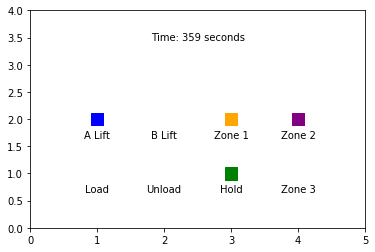

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Sample data (replace with your actual simulation data)
num_trains = 4
num_timesteps = 360
train_blocks = None  # Store current block
optional_params = {
    'random_seed': 10,
    'circuit_completion_blocks': ['Load']
}
circuit = Circuit(blocks, num_trains=num_trains, optional_params=optional_params)

# Initialize the plot
plt.figure(figsize=(10, 6))
plt.xlabel("Timestep")
plt.ylabel("Block")
plt.title("Train Movements on Track (Real-time)")
plt.ylim(0, 4)  # Adjust y-limit based on your block range
plt.xlim(0, 5)
plt.ion()  # Turn on interactive mode

block_locs = {
    'Load': (1, 1),
    'A Lift': (1, 2),
    'B Lift': (2, 2),
    'Zone 1': (3, 2),
    'Zone 2': (4, 2),
    'Zone 3': (4, 1),
    'Hold': (3, 1),
    'Unload': (2, 1)
}

block_txt = {block: block for block in circuit.blocks}

train_color_list = [ 'green', 'blue', 'orange', 'purple', 'black']  # List of colors
train_colors = dict()
i = 0
for t in circuit.trains:
    train_colors[t] = train_color_list[i]
    i += 1

# Simulation loop
for t in range(num_timesteps):
    # Simulate train movement (replace with your actual logic)
    circuit.step()
    train_blocks = [block_locs[circuit.trains[t].current_block] for t in circuit.trains]
    # Clear the previous plot
    clear_output(wait=True)
    
    # show labels for block areas
    for b in block_locs:
        block_x, block_y = block_locs[b]
        plt.text(block_x, block_y - 0.2, block_txt[b], ha='center', va='top')
    plt.text(2.5, 3.6, f'Time: {t} seconds', ha='center', va='top')
    # Update the plot # color=train_colors[:num_trains]
    #plt.plot([x[0] for x in train_blocks], [x[1] for x in train_blocks], marker='s', linestyle='none')
    held_trains = [t for t in circuit.trains if circuit.trains[t].current_status == 'held' and circuit.trains[t].seconds_held_at_current_block > 0]
    not_held_trains = [t for t in circuit.trains if t not in held_trains]
    not_held_trains_blocks = [block_locs[circuit.trains[t].current_block] for t in not_held_trains]
    held_trains_blocks = [block_locs[circuit.trains[t].current_block] for t in held_trains]
    plt.scatter([x[0] for x in not_held_trains_blocks], [x[1] for x in not_held_trains_blocks], 
                c=[train_colors[t] for t in circuit.trains if t in not_held_trains], marker='s', s=150)
    plt.scatter([x[0] for x in held_trains_blocks], [x[1] for x in held_trains_blocks], 
                c=[train_colors[t] for t in circuit.trains if t in held_trains], marker='s', s=150, 
                edgecolors='red', # Color of the square boundaries
                linewidths=1.5)
    plt.ylim(0, 4)  # Adjust y-limit based on your block range
    plt.xlim(0, 5)
    #plt.legend()  # [f"Train {i+1}" for i in range(num_trains)]
    plt.draw()
    plt.pause(0.01)  # Adjust pause time for animation speed

plt.ioff()  # Turn off interactive mode
plt.show()

In [31]:
[circuit.trains[t].current_status for t in circuit.trains]


['before block', 'after block - from held', 'before block', 'held']

In [36]:
not_held_trains
not_held_trains_blocks
[train_colors[t] for t in circuit.trains if t in not_held_trains]

['green', 'blue', 'orange', 'purple']